## Figure3

In [2]:
## packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import matplotlib as mpl
import pandas as pd
from sklearn.metrics import auc

In [5]:
## Paths
pathData = '../data/'
pathFln = '../data/Connectome/Kennedy.mat'

In [6]:
# Create dataframe
Seeds=10
N=19
listDF=[]

for seed in range(Seeds):

    # Fln
    conn = loadmat(pathFln)
    conn=conn['Fln']
    # GPDC
    dataGpdc=np.load(pathData+'Seed'+str(seed+1)+'/gpdc.npz')
    fGpdc=dataGpdc['arr_0']
    gpdcMatrix=dataGpdc['arr_1'] 
    # Firing Rate 
    dataFr=np.load(pathData+'Seed'+str(seed+1)+'/firingRate.npz')
    frMatrix=dataFr['arr_0']
 
    for i in range(N): # source
        for j in range(N): # target
            listTemp=[]
            if i!=j:
                # source
                listTemp.append(i) 
                # target
                listTemp.append(j)
                # fln
                listTemp.append(conn[i,j])
                # seed
                listTemp.append(seed+1)
                # fr_exc_source
                listTemp.append(frMatrix[i,0])
                # fr_inh_source
                listTemp.append(frMatrix[i,1])
                # fr_total_source
                listTemp.append(frMatrix[i,2])
                # fr_exc_target
                listTemp.append(frMatrix[j,0])
                # fr_inh_target
                listTemp.append(frMatrix[j,1])
                # fr_total_target
                listTemp.append(frMatrix[j,2])
                # gpdc_peak
                listTemp.append(np.max(gpdcMatrix[j,i,:]))
                # gpdc_auc
                listTemp.append(auc(fGpdc,np.squeeze(gpdcMatrix[j,i,:])))
    
                listDF.append(listTemp)

col=['source', 'target','fln', 'seed', 'fr_exc_source', 'fr_inh_source', 
     'fr_total_source', 'fr_exc_target', 'fr_inh_target', 
     'fr_total_target','gpdc_peak','gpdc_auc']

# Create DataFrame
df = pd.DataFrame(listDF, columns = col)                   


In [7]:
df.head()

,source,target,fln,seed,fr_exc_source,fr_inh_source,fr_total_source,fr_exc_target,fr_inh_target,fr_total_target,gpdc_peak,gpdc_auc
0,0,1,0.000137,1,3.191958,4.7765,3.508867,3.181375,4.731750,3.491450,0.003790,0.426005
1,0,2,0.052330,1,3.191958,4.7765,3.508867,3.573625,4.734250,3.805750,0.115722,10.869419
2,0,3,0.005557,1,3.191958,4.7765,3.508867,3.154812,4.794417,3.482733,0.010966,1.423932
3,0,4,0.011400,1,3.191958,4.7765,3.508867,3.060188,4.638000,3.375750,0.011176,2.535907
4,0,5,0.003106,1,3.191958,4.7765,3.508867,3.937375,4.748167,4.099533,0.095930,6.907251


## Fr target vs GPDC mean to target (weighted by Firing Rate source)

In [8]:
listFr=[]
meanGPDC=[]

for seedValues in range(1,11):
    for targetValues in range(19):
        

        dfTemp=df.loc[(df["seed"] == seedValues) & (df["target"] == targetValues)]  
        listFr.append(np.mean(dfTemp['fr_total_target']))
        meanGPDC.append(np.sum(dfTemp['gpdc_peak']*dfTemp['fr_total_source']))


(0.0, 3.0)

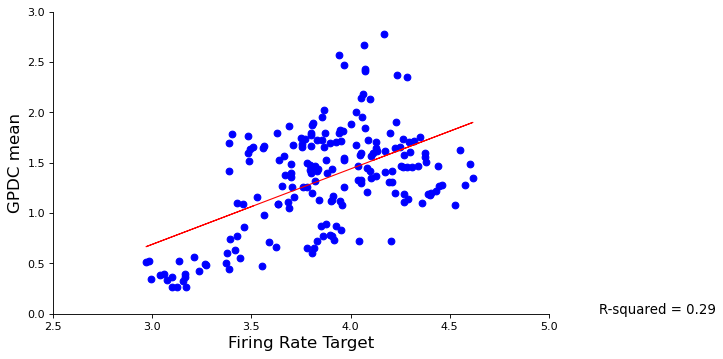

In [9]:
fig=plt.figure(figsize=(8, 5), dpi= 80, facecolor='w', edgecolor='k')

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

plt.plot(listFr,meanGPDC,'b.',markersize=12)


# linear regression
X = np.array(listFr)
y = meanGPDC
X = X.reshape(len(X), 1)
reg = LinearRegression().fit(X, y) 
plt.plot(X, reg.predict(X), color='red', linewidth=1)
plt.text(5.25, 0.0010, 'R-squared = %0.2f' % (r2_score(y, reg.predict(X))),fontsize=12)


plt.ylabel('GPDC mean',fontsize=15)
plt.xlabel('Firing Rate Target',fontsize=15)
plt.xlim([2.5, 5])
plt.ylim([0.000, 3])

## Fr target vs FLN mean to target (weighted by Firing Rate source)


In [10]:
listFr=[]
meanFLN=[]

for seedValues in range(1,11):
    for targetValues in range(19):

        dfTemp=df.loc[(df["seed"] == seedValues) & (df["target"] == targetValues)]  
        listFr.append(np.mean(dfTemp['fr_total_target']))
        meanFLN.append(np.sum(dfTemp['fln']*dfTemp['fr_total_source']))
    

(0.0, 4.0)

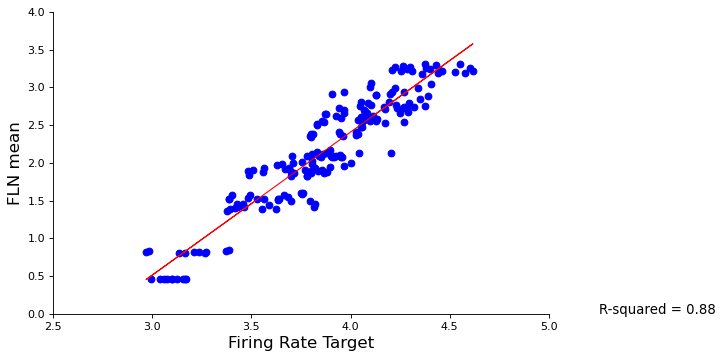

In [11]:
fig=plt.figure(figsize=(8, 5), dpi= 80, facecolor='w', edgecolor='k')

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

plt.plot(listFr,meanFLN,'b.',markersize=12)


# linear regression
X = np.array(listFr)
y = meanFLN
X = X.reshape(len(X), 1)
reg = LinearRegression().fit(X, y) 
plt.plot(X, reg.predict(X), color='red', linewidth=1)
plt.text(5.25, 0.0010, 'R-squared = %0.2f' % (r2_score(y, reg.predict(X))),fontsize=12)


plt.ylabel('FLN mean',fontsize=15)
plt.xlabel('Firing Rate Target',fontsize=15)
plt.xlim([2.5, 5])
plt.ylim([0.000, 4])